# 선형회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

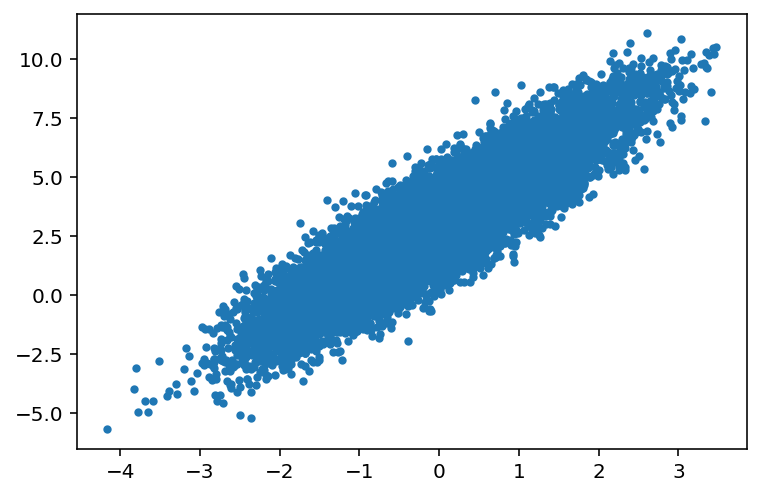

In [2]:
n_samples = 20000
x = np.random.randn(n_samples) ##평균0, 표준편차1
w = 2  ## 기울기
b = 3  ## y절편
y = w*x + b + np.random.randn(n_samples) 
  #y=2x+3의 선형에서 노이즈(np.random.randn)를 발생
plt.scatter(x,y, s=10)

In [3]:
np.corrcoef(x,y)   ##상관관계

array([[1.        , 0.89414946],
       [0.89414946, 1.        ]])

In [3]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()  ##선형회귀 함수
leg.fit(x.reshape(-1,1), y)  ## 선형회귀 끝났음 --> 모델

print(leg.coef_)   ## 선형회귀 값의 기울기
print(leg.intercept_)  ## 선형회귀 값의 y절편

print(leg.score(x.reshape(-1,1),y))  #신뢰도

[1.99916182]
3.0111891370690964
0.7984959530231612


# 다중 선형 회귀

In [4]:
## 강제로 x1, x2라는 독립변수와 y라는 종속변수의 데이터를 만들기

n_samples = 20
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)
## 독립변수 값이 여러개

In [5]:
leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})  
## 데이터프레임으로 만들어서 1개의 개체로 인식

leg.fit(X, y)

print(leg.coef_)  ## 선형회귀 기울기
print(leg.intercept_) ## 선형회귀 Y절편
leg.score(X,y)

[1.96046583 2.67524098]
3.838654824019653


0.835274327316363

In [6]:
from sklearn import datasets 
iris = datasets.load_iris() ; 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


sepal  : 꽃받침
petal  : 꽃잎

In [9]:
X_all = iris.data ## 딕셔너리의 키값인 data로 접근해서 키의값을 추출
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [10]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:5]) 
print(y[0:5])

[5.1 4.9 4.7 4.6 5. ]
[1.4 1.4 1.3 1.5 1.4]


Text(0, 0.5, 'Petal length')

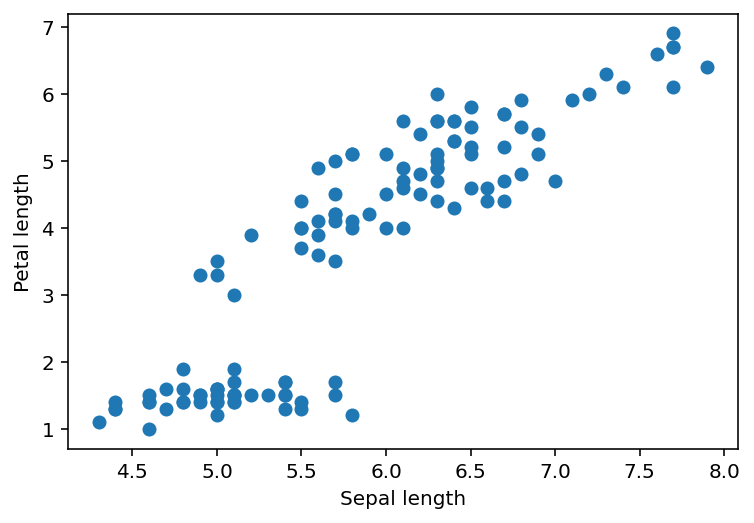

In [11]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") ; plt.ylabel("Petal length")

In [12]:
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)  ## 선형회귀
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

print(linr.score(X_test.reshape(-1,1), y_test))  ## 검증 신뢰도
print(linr.coef_)  
print(linr.intercept_)

Score : 0.655
0.6545777123136304
[1.8699969]
-7.233315234253802


In [ ]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
XX = np.linspace(4, 8, 200) ; 
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

In [14]:
for _ in range(5):
    print("안녕")

안녕
안녕
안녕
안녕
안녕


In [16]:
for i in range(5):
    print("안녕", i)

안녕 4
안녕 4
안녕 4
안녕 4
안녕 4


In [ ]:
a,b=2,5

In [ ]:
a=2,5